In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

from transmitter import transmitter
from receiver import receiver

In [9]:
t = transmitter()

to_transmit = t.transmit("max_test_in.txt", playsound=False)

transmitted_bits = t.process_file("max_test_in.txt")

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
LDPC Encoding Length: 30712
LDPC Padding Length: 392
OFDM Encoding Length: 62208
OFDM Padding Length: 0
Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
386016


/Users/maxiyengar/Documents/GF3/GF3/ldpc_jossy/transmitter.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  to_transmit[index]  = np.concatenate((cyclic_prefix, x), axis = None)


In [10]:
channel_response = np.loadtxt('../weekend_files/channel.csv', delimiter = ",", dtype = "float")

# Convolve w/ channel response

to_decode = np.convolve(channel_response, to_transmit)
to_decode = to_decode[:-1 * len(channel_response) + 1]

# NOISE

for index, i in enumerate(to_decode):
    to_decode[index] = i + random.gauss(0.0, 0.0)

to_decode = np.concatenate((np.zeros(500), to_decode, np.zeros(500)))

In [11]:
def success(a, b):
    """find the percentage difference between two lists"""
    successes = 0

    for index, i in enumerate(a):
        if i == b[index]:
            successes += 1 / len(a)

    return successes

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568


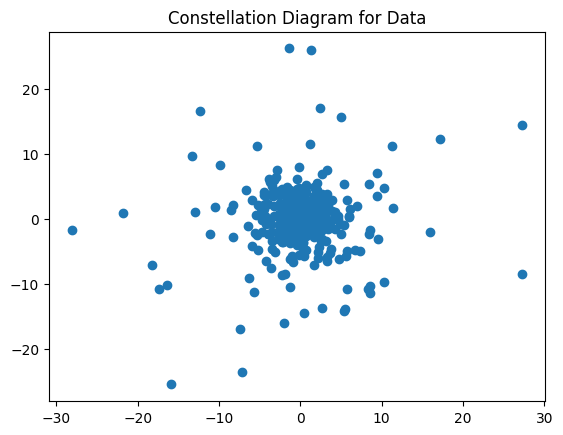

None
0.506414430841224
$ÜÆÿÿ¯ÿ¯ÿÿÿÿÿÿÿÿÿÿßÿ×ÿ×ÿÿÿÿÿ¥ÿ¥¥¡¡¡¡ááá_é_è_è_è_è_è_è_ø_ú_ú_ú_ú_þ_õ_õ_õWõUÔ¶Ë3`êúªªªª¨º¨:¨>¨>¨>¨¨¨ªªªêêêêêêêêúúúúúú ú ú ú ú¨UUUUUTUTTTTUU  ½K6Ìyåß¨>¨>¨>¨¨¨ªªªêêêêêêêúúúúúúú ú ú ú ú¨ªªªªª*ª
ª
ª¨¨ ¨ ¨ ¨ (  (j -	3'xxxxxxx|~~~~~~~^^_____@PPPPT T T U U U @@@@``px ­½ááþúúúúúú¡þ¡þ¡þ¡þ¡þ þ þ þ¨þ¨þªªªªªª«ª«ê«ê«êªúªúªþªþªÿª¿ª¿ª¿ê¿êêêúúúúþ¥ÿ¡UU-4Ìè\øøü~~~~____W 

          ( ( ( h j j z z Z Z Z Z ^ ^ ^^^^ ^ª¿[m9è^þWþWúWþWþWþ_þ                ¨ ( ( * * j j zZZZ^^        ¨¨ýR$f8~_ú_þ                      ( ( ( j j j z ZZZ^^         ¨¨¨¨¨ª õKõõ_õ_õWýWýWýUýUÿUUUUÕ_Õ_Å_Å_á_áWáWáWàWðWðWøWøWøUøøøøüþþþ~~U_ÿ¿ÿ¿ÿ¯ÿ¯ÿ¯ÿïÿïÿÿÿûÿûÿþÿþÿþþþþþþþ¥ÿ¥ÿ¥ÿ¡¡¡¡¡¡éé_è_è_è_è_è_ø_ú_ú_úWþWÿUUUUUUUTUTUUUUUUUAUAU@U@UÀUàUàðððxxxxxx~~~~^^^^__WWWUÖ+÷«ö¿¾

In [12]:

r = receiver()

r.set_bits_and_file_name(30712,'asdf')

r.entire_data = to_decode

binary_data = r.data_block_processing()

plt.scatter(r.constellations[0:500].real, r.constellations[0:500].imag)
plt.title("Constellation Diagram for Data")
plt.show()
print(r.chirp_start)

print(success(binary_data, transmitted_bits))
print(r.decode_text(binary_data))